In [1]:
import lorm
from nfft import nfft
import disc.energy_stippling_2d
import numpy as np
import matplotlib.pyplot as plt

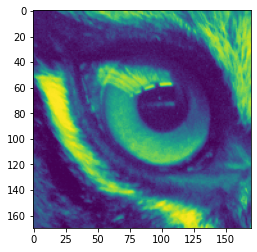

In [2]:
%matplotlib inline
mu = 256-plt.imread('data/eyeofthetiger.jpg')
mu_N_half = int(mu.shape[0]/2)

M = 2*mu_N_half
x = np.linspace(-0.5,0.5,M,endpoint=False)
x1,x2 = np.meshgrid(x,x)
quat_nodes = np.array([x1.ravel()[:],-x2.ravel()[:]]).transpose()
plt.imshow(256-mu.reshape(M,M))

nfft2d = nfft.NFFT2D(M**2,2*mu_N_half,2*mu_N_half)
nfft2d.x = quat_nodes
nfft2d.precompute_x()
nfft2d.f = mu/M**2
nfft2d.adjoint()
mu_hat = np.zeros([2*mu_N_half,2*mu_N_half],dtype=complex)
mu_hat[:] = nfft2d.f_hat/nfft2d.f_hat[mu_N_half,mu_N_half]

In [3]:
e2 = lorm.manif.EuclideanSpace(2)
points = lorm.manif.ManifoldPointArray(e2)
points.coords = np.random.rand(100,2)-0.5

In [4]:
N_half = 64
N=2*N_half
m = points.coords.shape[0]
energy = disc.energy_stippling_2d.plan(m,N)
if mu_N_half >= N_half:
    energy._mu_hat[:] = mu_hat[mu_N_half-N_half:mu_N_half+N_half,mu_N_half-N_half:mu_N_half+N_half]
else:
    energy._mu_hat[N_half-mu_N_half:N_half+mu_N_half,N_half-mu_N_half:N_half+mu_N_half] = mu_hat[:]

<IPython.core.display.Javascript object>


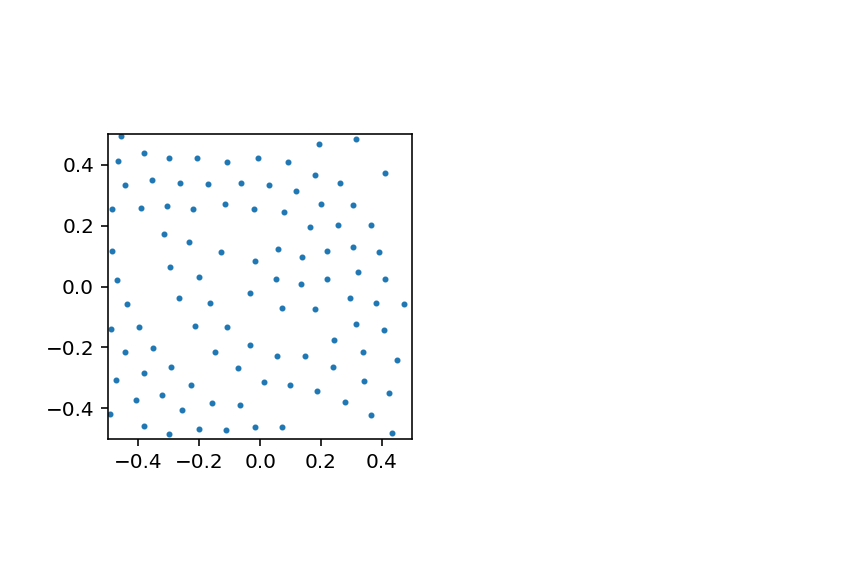

In [5]:
%matplotlib notebook
fig = plt.figure()#dpi=150)
ax = fig.add_subplot(121)
ax.axis(np.array([-.5,.5,-0.5,0.5]))
ax.axes.set_aspect(1)

s, = ax.plot(points.coords[:,0], points.coords[:,1], 'o', markersize=2)
def update_points(p):
    s.set_xdata(np.mod(p.coords[:,0]+0.5,1)-0.5)
    s.set_ydata(np.mod(p.coords[:,1]+0.5,1)-0.5)
    fig.canvas.draw()
    return


In [7]:
method=lorm.optim.ConjugateGradientMethod(max_iter=50,tol_grad=1e-12)
method.listener = update_points
for i in range(3):
    points = method.run(energy,points)
points.coords = np.mod(points.coords+0.5,1)-0.5

Initial value: f[0] = 0.007447132802202829
f[1] = 0.007447132802193229
f[2] = 0.00744713280218389
f[3] = 0.007447132802173605
f[4] = 0.0074471328021645695
f[5] = 0.007447132802159204
f[6] = 0.007447132802155086
f[7] = 0.007447132802151903
f[8] = 0.007447132802149283
f[9] = 0.007447132802147002
f[10] = 0.007447132802145583
f[11] = 0.007447132802144324
f[12] = 0.007447132802143368
f[13] = 0.0074471328021426
f[14] = 0.00744713280214203
f[15] = 0.007447132802141645
f[16] = 0.00744713280214135
f[17] = 0.007447132802141137
f[18] = 0.007447132802140955
f[19] = 0.007447132802140811
f[20] = 0.007447132802140708
f[21] = 0.007447132802140606
f[22] = 0.007447132802140538
f[23] = 0.007447132802140478
f[24] = 0.007447132802140427
f[25] = 0.007447132802140382
f[26] = 0.007447132802140355
f[27] = 0.007447132802140333
f[28] = 0.0074471328021403155
f[29] = 0.007447132802140297
f[30] = 0.007447132802140287
f[31] = 0.0074471328021402765
f[32] = 0.007447132802140267
f[33] = 0.007447132802140264
Line search